In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from konlpy.tag import Mecab
import matplotlib.pyplot as plt

# torch
import torch
import torchvision.transforms as T

server = 'docker'

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
mecab = Mecab()
def tokenize(sentence):
    return mecab.morphs(sentence)

data['morph'] = data['overview'].apply(tokenize)
data['mecab_data'] = data['morph'].apply(lambda x: ' '.join(x))
del data['morph']
data.to_csv('/root/share/tour_ai/data/mecab_test_data.csv', index=False)

In [2]:
if server == 'docker':
  data_path = '/root/share/tour_ai/data/train.csv'
  test_data_path = '/root/share/tour_ai/data/test.csv'
elif server == 'colab':
  data_path = '/content/drive/MyDrive/commit_folder/competition/tour_ai/data/train.csv'
  mecab_data_path = '/content/drive/MyDrive/commit_folder/competition/tour_ai/data/mecab_data.csv'

In [3]:
data = pd.read_csv('/root/share/tour_ai/data/train.csv')
# mecab_data = pd.read_csv(mecab_data_path)

In [ ]:
# 이미지 불러오기
'''
img = Image.open('/root/share/tour_ai/data/image/train/TRAIN_00000.jpg')

tf = T.ToTensor()
img_t = tf(img)
'''

"\nimg = Image.open('/root/share/tour_ai/data/image/train/TRAIN_00000.jpg')\n\ntf = T.ToTensor()\nimg_t = tf(img)\n"

In [ ]:
# mecab data 생성
'''
mecab = Mecab()
def tokenize(sentence):
    return mecab.morphs(sentence)

data['morph'] = data['overview'].apply(tokenize)
data['mecab_data'] = data['morph'].apply(lambda x: ' '.join(x))
del data['morph']
data.to_csv('/root/share/tour_ai/data/mecab_data.csv', index=False)
'''

In [ ]:
# text 데이터 확인
mecab_data['morph'] = mecab_data['mecab_data'].apply(lambda x : x.split(' '))
mecab_data['length'] = mecab_data['morph'].apply(lambda x: len(x))
mecab_data['length'].describe([.75, .90, .99])

count    16986.000000
mean       166.724714
std        144.044349
min          2.000000
50%        135.000000
75%        206.750000
90%        308.000000
99%        710.150000
max       4006.000000
Name: length, dtype: float64

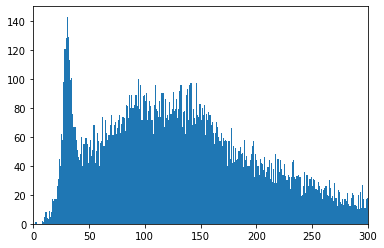

In [ ]:
plt.hist(mecab_data['length'], bins=4006)
plt.xlim(0,300)
plt.show()

In [ ]:
mecab_data['length'].describe([.90, .99])

count    16986.000000
mean       166.724714
std        144.044349
min          2.000000
50%        135.000000
90%        308.000000
99%        710.150000
max       4006.000000
Name: length, dtype: float64

In [1]:
# label 개수 확인 필요

In [4]:
data.head()

,id,img_path,overview,cat1,cat2,cat3
0,TRAIN_00000,./image/train/TRAIN_00000.jpg,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,TRAIN_00001,./image/train/TRAIN_00001.jpg,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,TRAIN_00002,./image/train/TRAIN_00002.jpg,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,TRAIN_00003,./image/train/TRAIN_00003.jpg,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,TRAIN_00004,./image/train/TRAIN_00004.jpg,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식


In [5]:
data_grp = data.groupby('cat3').count()

In [8]:
data_grp = data_grp['id'].reset_index()

In [10]:
data_grp.sort_values('id', ascending=False)

,cat3,id
118,한식,3438
73,"야영장,오토캠핑장",1558
41,바/까페,785
85,유적지/사적지,622
90,일반축제,549
...,...,...
22,대중콘서트,2
108,클래식음악회,2
36,뮤지컬,2
89,인라인(실내 인라인 포함),2


In [14]:
data_grp.sort_values('id', ascending=False)['id'].tolist()

[3438,
 1558,
 785,
 622,
 549,
 495,
 467,
 445,
 404,
 340,
 332,
 310,
 271,
 270,
 246,
 243,
 239,
 226,
 211,
 209,
 207,
 207,
 204,
 179,
 173,
 172,
 165,
 160,
 151,
 148,
 134,
 126,
 120,
 119,
 118,
 113,
 111,
 105,
 104,
 95,
 95,
 92,
 92,
 88,
 85,
 83,
 79,
 76,
 71,
 65,
 64,
 61,
 60,
 57,
 57,
 53,
 53,
 43,
 41,
 41,
 40,
 39,
 37,
 36,
 36,
 35,
 34,
 34,
 30,
 30,
 29,
 27,
 27,
 27,
 26,
 25,
 24,
 24,
 23,
 22,
 21,
 21,
 20,
 20,
 20,
 18,
 18,
 17,
 17,
 15,
 15,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2]